In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')

import datetime as dt
import dateutil

import importlib

In [3]:
df = pd.read_csv(r'D:\vit\Sem6_VIT\CSE3062P\Preprocessing\streetlight.csv')

C:\Users\SanLaxSuryaRays\anaconda3\envs\hello-tf\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,3,6,7,8,9,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,ROUTEID,FROMMEASURE,TOMEASURE,EVENTID,XCOORD,YCOORD,ADDEDBY,ADDTOGIS,ARMSTYLE_DESC,ASSETSTATUS_DESC,...,LASTMODIFIED,LIGHTHISTORY,LIGHTTYPE_DESC,POLEHEIGHT_DESC,STREETLIGHTID,STREETNAME,WATTAGE1,MAXTEMP,HUMIDITY,WINDSPEED
0,11031852,979.774492,1082.634792,{884E10C2-C3FA-4E28-8638-522F4DED841B},396650.0,140096.0,Osmose,2007/06/21 00:00:00+00,Simple Pendant,Active,...,NaN,5/27/2016 Correct asset location.,HPS-High Pressure Sodium,30 ft,10599,IRVING ST,400.0,6.490245,93.82894,5.091168
1,11089372,0.000000,538.309100,{E6F72A2B-1E91-4DF2-887D-363AB69E1BC8},396186.0,140770.0,Osmose,2007/06/19 00:00:00+00,NaN,Active,...,NaN,5/24/2016 Correct asset location.,HPS-High Pressure Sodium,16 ft,10065,INGLESIDE TER,250.0,6.060246,94.19782,3.976330
2,11084762,395.305351,515.661500,{D160031A-09CA-4909-9658-05B081004483},396449.0,139700.0,Osmose,2007/06/21 00:00:00+00,Simple Pendant,Active,...,NaN,5/25/2016 Correct asset location.,HPS-High Pressure Sodium,30 ft,10686,ONTARIO RD,400.0,5.560246,94.83262,4.320000
3,11031852,737.351021,979.774492,{B5E8321C-F9F1-4A13-93B6-8C604C89C7D2},397055.0,140696.0,Osmose,2007/06/18 00:00:00+00,NaN,Active,...,NaN,5/31/2016 Correct asset location.,HPS-High Pressure Sodium,16 ft,13790,OAK ST,250.0,4.630245,96.47203,3.259938
4,11084762,190.144211,395.305351,{69E3D5BD-E942-451C-A961-49960F2511E7},396720.0,140204.0,Osmose,2007/06/20 00:00:00+00,NaN,Active,...,2018/06/01 00:00:00+00,5/27/2016 Correct asset location.,LED-Light Emitting Diode,16 ft,10404,MOUNT PLEASANT ST,120.0,3.660245,97.11870,3.545589


In [5]:
df.shape

(71722, 22)

In [6]:
cols = df.columns.to_list()

In [7]:
cols

['ROUTEID',
 'FROMMEASURE',
 'TOMEASURE',
 'EVENTID',
 'XCOORD',
 'YCOORD',
 'ADDEDBY',
 'ADDTOGIS',
 'ARMSTYLE_DESC',
 'ASSETSTATUS_DESC',
 'ASSETTYPE',
 'FACILITYID',
 'LASTMODIFIED',
 'LIGHTHISTORY',
 'LIGHTTYPE_DESC',
 'POLEHEIGHT_DESC',
 'STREETLIGHTID',
 'STREETNAME',
 'WATTAGE1',
 'MAXTEMP',
 'HUMIDITY',
 'WINDSPEED']

In [8]:
n_records = df.shape[0]

In [9]:
df.drop(columns=['EVENTID', 'STREETNAME'], inplace=True)

In [10]:
df.head()

,ROUTEID,FROMMEASURE,TOMEASURE,XCOORD,YCOORD,ADDEDBY,ADDTOGIS,ARMSTYLE_DESC,ASSETSTATUS_DESC,ASSETTYPE,FACILITYID,LASTMODIFIED,LIGHTHISTORY,LIGHTTYPE_DESC,POLEHEIGHT_DESC,STREETLIGHTID,WATTAGE1,MAXTEMP,HUMIDITY,WINDSPEED
0,11031852,979.774492,1082.634792,396650.0,140096.0,Osmose,2007/06/21 00:00:00+00,Simple Pendant,Active,1.0,10599,NaN,5/27/2016 Correct asset location.,HPS-High Pressure Sodium,30 ft,10599,400.0,6.490245,93.82894,5.091168
1,11089372,0.000000,538.309100,396186.0,140770.0,Osmose,2007/06/19 00:00:00+00,NaN,Active,1.0,10065,NaN,5/24/2016 Correct asset location.,HPS-High Pressure Sodium,16 ft,10065,250.0,6.060246,94.19782,3.976330
2,11084762,395.305351,515.661500,396449.0,139700.0,Osmose,2007/06/21 00:00:00+00,Simple Pendant,Active,1.0,10686,NaN,5/25/2016 Correct asset location.,HPS-High Pressure Sodium,30 ft,10686,400.0,5.560246,94.83262,4.320000
3,11031852,737.351021,979.774492,397055.0,140696.0,Osmose,2007/06/18 00:00:00+00,NaN,Active,1.0,13790,NaN,5/31/2016 Correct asset location.,HPS-High Pressure Sodium,16 ft,13790,250.0,4.630245,96.47203,3.259938
4,11084762,190.144211,395.305351,396720.0,140204.0,Osmose,2007/06/20 00:00:00+00,NaN,Active,1.0,10404,2018/06/01 00:00:00+00,5/27/2016 Correct asset location.,LED-Light Emitting Diode,16 ft,10404,120.0,3.660245,97.11870,3.545589


## Dropping NANs

In [11]:
filling_rates = 100.*df.count().sort_values(ascending=False)/df.shape[0]
print(filling_rates)

XCOORD              31.351608
YCOORD              31.351608
ASSETSTATUS_DESC    31.351608
ASSETTYPE           31.350213
FACILITYID          31.350213
HUMIDITY            31.348819
FROMMEASURE         31.348819
TOMEASURE           31.348819
ADDEDBY             31.348819
ADDTOGIS            31.348819
WINDSPEED           31.348819
LIGHTTYPE_DESC      31.348819
STREETLIGHTID       31.348819
WATTAGE1            31.348819
MAXTEMP             31.348819
ROUTEID             31.348819
POLEHEIGHT_DESC     31.332088
LIGHTHISTORY        31.274923
ARMSTYLE_DESC       26.012939
LASTMODIFIED         4.615041
dtype: float64


In [12]:
df = df[df['ASSETSTATUS_DESC'].notna()]
df.shape

(22486, 20)

In [13]:
filling_rates = 100.*df.count().sort_values(ascending=False)/df.shape[0]
print(filling_rates)

XCOORD              100.000000
YCOORD              100.000000
ASSETSTATUS_DESC    100.000000
ASSETTYPE            99.995553
FACILITYID           99.995553
HUMIDITY             99.991106
FROMMEASURE          99.991106
TOMEASURE            99.991106
ADDEDBY              99.991106
ADDTOGIS             99.991106
WINDSPEED            99.991106
LIGHTTYPE_DESC       99.991106
STREETLIGHTID        99.991106
WATTAGE1             99.991106
MAXTEMP              99.991106
ROUTEID              99.991106
POLEHEIGHT_DESC      99.937739
LIGHTHISTORY         99.755403
ARMSTYLE_DESC        82.971627
LASTMODIFIED         14.720270
dtype: float64


In [14]:
df.drop(columns=['LASTMODIFIED'], inplace=True)

In [15]:
df = df[df['ARMSTYLE_DESC'].notna()]
df.shape

(18657, 19)

In [16]:
filling_rates = 100.*df.count().sort_values(ascending=False)/df.shape[0]
print(filling_rates)

WINDSPEED           100.000000
ASSETSTATUS_DESC    100.000000
FROMMEASURE         100.000000
TOMEASURE           100.000000
XCOORD              100.000000
YCOORD              100.000000
ADDEDBY             100.000000
ADDTOGIS            100.000000
ARMSTYLE_DESC       100.000000
ASSETTYPE           100.000000
HUMIDITY            100.000000
FACILITYID          100.000000
LIGHTTYPE_DESC      100.000000
STREETLIGHTID       100.000000
WATTAGE1            100.000000
MAXTEMP             100.000000
ROUTEID             100.000000
POLEHEIGHT_DESC      99.951761
LIGHTHISTORY         99.753444
dtype: float64


In [18]:
records_without_nan = df.shape[0]

In [19]:
f_records_without_nan = records_without_nan/n_records
print('Fraction of the original dataset: {:f}'.format(f_records_without_nan))

Fraction of the original dataset: 0.260129


In [20]:
df.drop(columns=['ADDEDBY'], inplace=True)

In [23]:
df.drop(columns=['LIGHTHISTORY'], inplace=True)

In [24]:
df.head()

,ROUTEID,FROMMEASURE,TOMEASURE,XCOORD,YCOORD,ADDTOGIS,ARMSTYLE_DESC,ASSETSTATUS_DESC,ASSETTYPE,FACILITYID,LIGHTTYPE_DESC,POLEHEIGHT_DESC,STREETLIGHTID,WATTAGE1,MAXTEMP,HUMIDITY,WINDSPEED
0,11031852,979.774492,1082.634792,396650.0,140096.0,2007/06/21 00:00:00+00,Simple Pendant,Active,1.0,10599,HPS-High Pressure Sodium,30 ft,10599,400.0,6.490245,93.828940,5.091168
2,11084762,395.305351,515.661500,396449.0,139700.0,2007/06/21 00:00:00+00,Simple Pendant,Active,1.0,10686,HPS-High Pressure Sodium,30 ft,10686,400.0,5.560246,94.832620,4.320000
5,11086902,0.000000,92.173896,397112.0,140598.0,2007/06/18 00:00:00+00,Regular Alley,Active,2.0,13903,HPS-High Pressure Sodium,28 ft,13903,150.0,3.880245,96.165750,3.671294
6,11082032,291.747936,392.242800,396777.0,140902.0,2007/06/19 00:00:00+00,Regular Alley,Active,2.0,14513,HPS-High Pressure Sodium,28 ft,14513,400.0,3.650245,96.980194,4.349896
7,11086902,92.173896,216.710551,396484.0,140445.0,2007/06/20 00:00:00+00,Regular Alley,Active,2.0,10312,HPS-High Pressure Sodium,28 ft,10312,70.0,3.110245,97.793210,5.191994


## Date Preprocessing

In [28]:
def get_date_timestamp(df_row):
    
    date_timestamp = None
    if (str(df_row['ADDTOGIS']) == 'nan'):
        date_timestamp = None
    else:
        date_timestamp = dateutil.parser.parse(df_row['ADDTOGIS'])
    return date_timestamp

In [29]:
df['date_timestamp'] = df.apply(lambda x: get_date_timestamp(x), axis=1)

In [30]:
def get_date_day(df_row):
    date_day = None
    if (str(df_row['date_timestamp']) == 'NaT'):
        date_day = None
    else:
        date_day = df_row['date_timestamp'].day
    return date_day

def get_date_month(df_row):
    review_date_month = None
    if (str(df_row['date_timestamp']) == 'NaT'):
        date_month = None
    else:
        date_month = df_row['date_timestamp'].month
    return date_month

def get_date_year(df_row):
    date_year = None
    if (str(df_row['date_timestamp']) == 'NaT'):
        date_year = None
    else:
        date_year = df_row['date_timestamp'].year
    return date_year

In [31]:
df['day'] = df.apply(lambda x: get_date_day(x),axis=1)
df['month'] = df.apply(lambda x: get_date_month(x),axis=1)
df['year'] = df.apply(lambda x: get_date_year(x),axis=1)

In [32]:
df.head()

,ROUTEID,FROMMEASURE,TOMEASURE,XCOORD,YCOORD,ADDTOGIS,ARMSTYLE_DESC,ASSETSTATUS_DESC,ASSETTYPE,FACILITYID,...,POLEHEIGHT_DESC,STREETLIGHTID,WATTAGE1,MAXTEMP,HUMIDITY,WINDSPEED,date_timestamp,day,month,year
0,11031852,979.774492,1082.634792,396650.0,140096.0,2007/06/21 00:00:00+00,Simple Pendant,Active,1.0,10599,...,30 ft,10599,400.0,6.490245,93.828940,5.091168,2007-06-21 00:00:00+00:00,21,6,2007
2,11084762,395.305351,515.661500,396449.0,139700.0,2007/06/21 00:00:00+00,Simple Pendant,Active,1.0,10686,...,30 ft,10686,400.0,5.560246,94.832620,4.320000,2007-06-21 00:00:00+00:00,21,6,2007
5,11086902,0.000000,92.173896,397112.0,140598.0,2007/06/18 00:00:00+00,Regular Alley,Active,2.0,13903,...,28 ft,13903,150.0,3.880245,96.165750,3.671294,2007-06-18 00:00:00+00:00,18,6,2007
6,11082032,291.747936,392.242800,396777.0,140902.0,2007/06/19 00:00:00+00,Regular Alley,Active,2.0,14513,...,28 ft,14513,400.0,3.650245,96.980194,4.349896,2007-06-19 00:00:00+00:00,19,6,2007
7,11086902,92.173896,216.710551,396484.0,140445.0,2007/06/20 00:00:00+00,Regular Alley,Active,2.0,10312,...,28 ft,10312,70.0,3.110245,97.793210,5.191994,2007-06-20 00:00:00+00:00,20,6,2007


In [33]:
cols_for_training = df.columns.to_list()

## Correlation matrix

In [35]:
feats_cat = ['ADDTOGIS',
             'ARMSTYLE_DESC',
             'ASSETSTATUS_DESC','LIGHTTYPE_DESC',
             'STREETLIGHTID', 'STREETNAME']
feats_num = [feat for feat in cols_for_training if feat not in feats_cat]

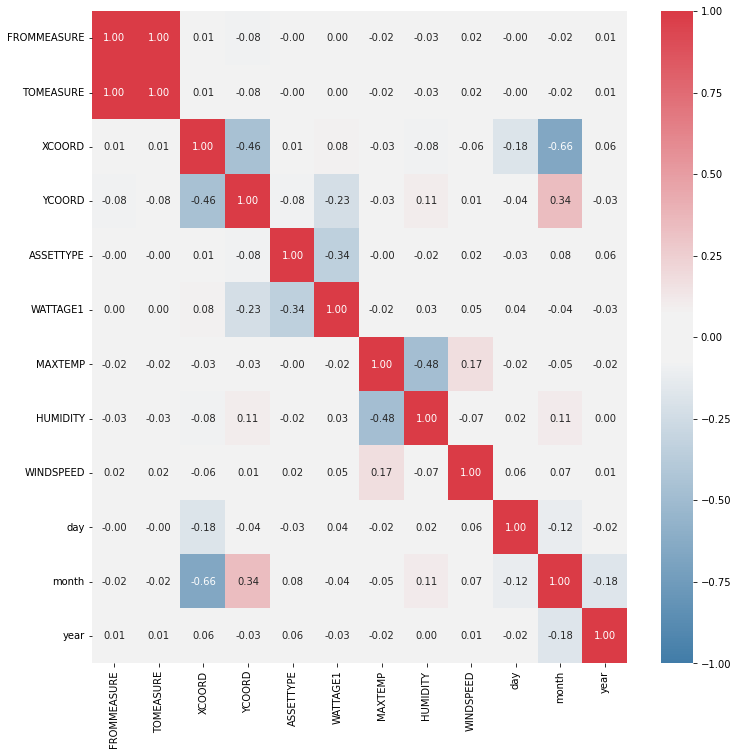

In [36]:
def plot_cmap(matrix_values, figsize_w, figsize_h, filename):
    if figsize_w is not None and figsize_h is not None:
        plt.figure(figsize=(figsize_w,figsize_h))
    else:
        plt.figure()
    cmap = sns.diverging_palette(240, 10, sep=20, as_cmap=True)
    sns.heatmap(matrix_values, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1)
    plt.savefig(filename)
    plt.show()
    return cmap
corr_values = df[feats_num].dropna(axis=0,how='any').corr()
plot_cmap(matrix_values=corr_values, 
          figsize_w=12, 
          figsize_h=12, 
          filename='./Corr.png')

In [37]:
cols_for_training = df.columns.to_list()
feats_num_for_training = [feat for feat in cols_for_training if feat not in feats_cat]

In [39]:
df.shape

(18657, 21)

## Saving file

In [41]:
df.to_csv('D:/vit/Sem6_VIT/CSE3062P/Preprocessing/Preprocessed_dataset.csv')